In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# The Goal of Curve Fitting

Suppose one has some $x_{\text{data}}=[...]$ and $y_{\text{data}}=[...]$. In curve fitting, one wants a  function $f$ (that depends on unknown parameters $\vec{\beta}$) where $y=f(x,\vec{\beta})$ *best resembles* the data.

As such, there are two things we need here. We first need to find a function $f(x;\vec{\beta})$ that we believe best fits the data. This usually depends on some sort of physical intuition

* **Example**: $x_{\text{data}}$ is the displacement of a spring and $y_{\text{data}}$ is the force on the spring. Since we know that Hooke's law applies to springs and $F = -kx$, we choose $f(x;k) = -kx$

* **Example**: One is doing an experiment where $x_{\text{data}}$ is time and $y_{\text{data}}$ is the heigh of a projectile. Since we know that physics kinematics applies to launched projectiles and $y = v_{0y}t - gt^2$, we would choose $f(x;v_{0y},g) = v_{0y}x - g x^2$ 



Lets look at some sample data:

In [3]:
x_data = np.array([0.        , 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.        ])
y_data = np.array([  2.95258285,   2.49719803,  -2.1984975 ,  -4.88744346,
        -7.41326345,  -8.44574157, -10.01878504, -13.83743553,
       -12.91548145, -15.41149046, -14.93516299, -13.42514157,
       -14.12110495, -17.6412464 , -16.1275509 , -16.11533771,
       -15.66076021, -13.48938865, -11.33918701, -11.70467566])
yerr_data = np.array([-3.32689693,  1.01519376,  2.85923397,  1.7348685 ,  0.68600388,
       -1.56672814,  0.72966568, -4.08243333,  0.74834469,  2.43068314,
        1.93869519, -1.40310696, -4.58790075, -0.0968304 ,  0.90420569,
        3.40836701,  0.46855775, -0.37114676, -1.3964944 ,  0.18482582])

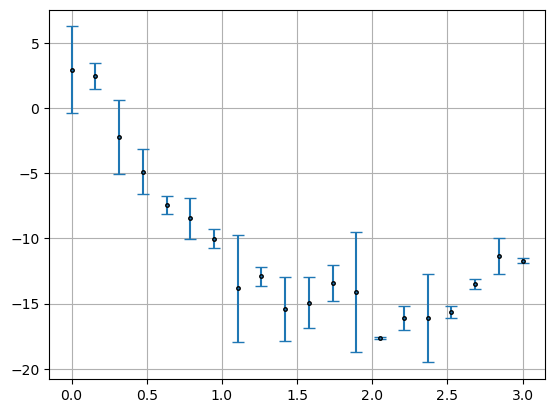

In [4]:
plt.errorbar(x_data, y_data, yerr_data, ls='', capsize=4, marker='.', ms=5, mec='black')
plt.grid()
plt.show()

Lets try a model where $\vec{\beta} = (a,b,c)$ and

$$f(x; \beta) = f(x; a, b, c) = a(x-b)^2 + c$$

In [5]:
def model_f(x, a, b, c):
    return a*(x-b)**2 + c

Some different possible combinations of values

In [7]:
a1, b1, c1 = 2, 3, 5
a2, b2, c2 = 4, 3, -17
a3, b3, c3 = 1, 2, -4

Create a few different curves:

In [8]:
x = np.linspace(min(x_data), max(x_data), 20)

In [9]:
x

array([0.        , 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.        ])

In [10]:
x = np.linspace(min(x_data), max(x_data), 20)
y1 = model_f(x, a1, b1, c1)
y2 = model_f(x, a2, b2, c2)
y3 = model_f(x, a3, b3, c3)

Look at these curves next to the data

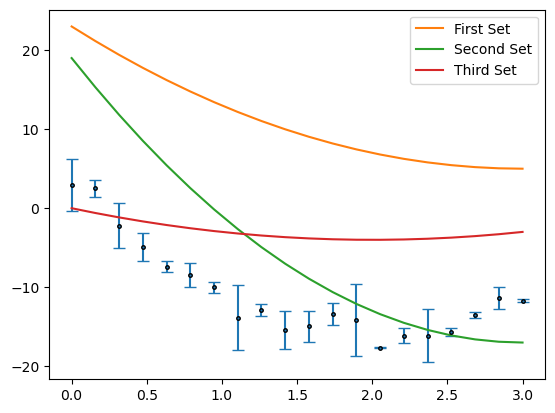

In [11]:
plt.errorbar(x_data, y_data, yerr_data, ls='', capsize=4, marker='.', ms=5, mec='black')
plt.plot(x, y1, label='First Set')
plt.plot(x, y2, label='Second Set')
plt.plot(x, y3, label='Third Set')
plt.legend()
plt.show()

*So how do we adjust $a$, $b$, and $c$ so that the curve $y=f(x;a,b,c)$ actually fits through the data?*

# Obtaining Optimal Parameters

Now that we have our function $f(x;\beta)$ decided, we need to optimize for $\beta$ that makes the curve fit through the data

* One way of doing this is to minimize $\sum_i (f(x_i,\beta) - y_i)^2$ by adjusting the parameters in $\beta$. Here $x_i$ and $y_i$ are the ith data point. This is called the method of least squares

* If the $y_i$ data points have corresponding uncertainties $\sigma_i$ on them, then minimizing $\sum_i (f(x_i,\beta) - y_i)^2/\sigma_i^2$ is often a better choice. (*Aside*: Why is this? It's because if $y_i$ are Gaussian random variables, minimizing the sum corresponds to the maximum liklihood estimation of $\beta$).

We want to find the optimal values of $a$, $b$, and $c$ that fit the data above in python

This requires two steps

1. Define model function
2. Use scipy's `curve_fit` function. This requires giving initial guesses for $\beta$, which one needs to obtain carefuly for complicated models, or else the function might not work.

In [13]:
def model_f(x, a, b, c):
    return a*(x-b)**2 + c

Use the curve fit function, which returns two things: `popt` and `pcov`:

In [25]:
popt, pcov = curve_fit(model_f, x_data, y_data, sigma=yerr_data, p0=[a2,b2,c2])

Two things are returned here:

1. `popt`, which gives the optimal parameters for the `model_f` given the data. These are in the order of the function arguments (after `x`).

In [26]:
popt

array([  5.89973737,   1.9907176 , -17.54593783])

Lets compute $\chi^2$. **NOTE: ERROR IN LECTURE: THE "UNREDUCED" (OR REGULAR) CHI2 FUNCTION IS DEFINED AS**

$$\chi^2 = \sum_i (f(x_i,\beta) - y_i)^2/\sigma_i^2$$

**AND THE REDUCED CHI2 VALUE IS DEFINED AS**

$$\chi^2 = \frac{1}{\text{N. data points} - \text{N. of parameters}}\sum_i (f(x_i,\beta) - y_i)^2/\sigma_i^2$$

In [1]:
def chi2(xdata, ydata, model_f, popt):
    return sum((model_f(xdata, *popt)-ydata)**2)

In [2]:
chi2(x_data, y_data, model_f, popt)

NameError: name 'x_data' is not defined

In [30]:
pcov

array([[ 0.04632191,  0.00055645, -0.01257024],
       [ 0.00055645,  0.00036507,  0.00077486],
       [-0.01257024,  0.00077486,  0.01850009]])

2. `pcov`: the covariance matrix, which gives an estimate of the "error" of the parameters based on how sensitive the "goodness-of-fit" is to changing them. For most scientific applications, all you need to know is that the square root of diagonal of this matrix gives errors on the fit parameters.


(*Aside*: The exact meaning of this is as follows. If the $y_i$ are Gaussian random variables, so that $\sigma_i$ represents the standard deviation, then $\sum_i (f(x_i,\beta) - y_i)^2/\sigma_i^2$ is distributed according to the $\chi^2$ distribution with $\text{N. data points} - \text{N. of parameters}$ degrees of freedom. The square root of the entries on the diagonal of the `pcov` tell you how much you can change each parameter (while reoptimizing the remaining ones) and have the $\chi^2$ value change by exactly 1. The entries off diagonal represent how if one variable is changed away from its optimal value, how would the others change to compensate to give the best fit).

In [32]:
np.diag(pcov)

array([0.04632191, 0.00036507, 0.01850009])

In [33]:
np.sqrt(np.diag(pcov))

array([0.21522525, 0.0191068 , 0.13601502])

Lets plot the function with the optimal parameters next to the data

In [36]:
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, *popt)

Plot

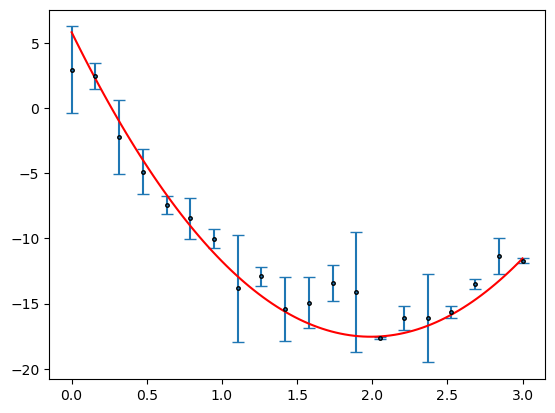

In [37]:
plt.errorbar(x_data, y_data, yerr_data, ls='', capsize=4, marker='.', ms=5, mec='black')
plt.plot(x_model,y_model, color='r')
plt.show()